In [30]:
import matplotlib.pyplot as plt
from math import sin
import math
from random import random
import numpy as np

In [3]:
#This is from the appendix, this will graph the two lines
def drawPlt():
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')

    x1 = np.linspace(0,2,100)
    y1 = np.sqrt(1-(x1-1)**2)
    ax1.plot(x1,y1,'k')

    y2 = 2-np.sqrt(4-x1**2)
    ax1.plot(x1,y2,'k')

    ax1.set_xlim(0,2)
    ax1.set_ylim(0,2)
    ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

    plt.show()
    return y1, y2, x1

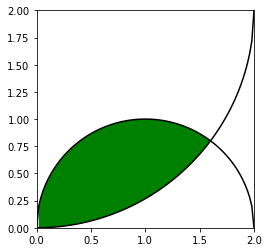

80 0.7876197450350676
1.6161616161616164


In [18]:
y1, y2, x1 = drawPlt()

def findIntersectingX(y1, y2):
    for i in range(0, len(y1)):
        if y1[i] < y2[i]:
            print(i, y1[i])
            return i

intersection = findIntersectingX(y1, y2)
xmax = x1[intersection]
print(xmax)

In [24]:
def MC(N, xmax):
    f = lambda c: np.sqrt(1-(c-1)**2) #Line 1
    g = lambda d: 2-np.sqrt(4-d**2) #Line 2
    k = 0;
    i = 0;
    while i < N:
        x = xmax * random()
        y = random()
        
        y1 = f(x)
        y2 = g(x)
        
        if y > y2 and y < y1:
            k += 1
        
        i+=1
        
    return k

count = MC(100000, xmax)
area = (count * (1 * xmax)) / 100000
print(str(area) + " area of the shaded green")
print(str(1 * xmax) + " area of the enclosing box")

print(count / 100000)

0.9619717171717174 area of the shaded green
1.6161616161616164 area of the enclosing box
0.59522


In [27]:
#This will find the different 
def multipleDists(xmax):
    f = lambda c: np.sqrt(1-(c-1)**2)
    g = lambda d: 2-np.sqrt(4-d**2)
    inc = 4
    N = 4
    probs = list()
    NVals = list()
    counts = list()
    for i in range(0, 100):
        if i == 100:
            inc = 36
        elif i == 1000:
            inc = 360
        elif i == 10000:
            inc = 3600
        
        count = MC(N, xmax)
        probs.append(count / N)
        NVals.append(N)
        counts.append(count)
        N += inc
        
    return probs, NVals, counts

probs, nvals, k = multipleDists(xmax)
print(np.array(probs))
        

[0.75       0.5        0.5        0.5625     0.6        0.625
 0.57142857 0.46875    0.52777778 0.475      0.56818182 0.58333333
 0.61538462 0.64285714 0.55       0.609375   0.52941176 0.66666667
 0.53947368 0.65       0.54761905 0.57954545 0.60869565 0.59375
 0.68       0.54807692 0.58333333 0.44642857 0.60344828 0.58333333
 0.56451613 0.609375   0.59090909 0.54411765 0.60714286 0.63888889
 0.50675676 0.58552632 0.62820513 0.61875    0.6097561  0.67857143
 0.60465116 0.55681818 0.58333333 0.57608696 0.60106383 0.56770833
 0.59693878 0.605      0.59803922 0.61538462 0.55660377 0.58333333
 0.57727273 0.5625     0.56578947 0.56034483 0.62288136 0.58333333
 0.61065574 0.63306452 0.57539683 0.6328125  0.61538462 0.625
 0.6119403  0.62132353 0.67028986 0.65       0.62676056 0.54861111
 0.5890411  0.55405405 0.60333333 0.55921053 0.54545455 0.59615385
 0.57911392 0.615625   0.58024691 0.57926829 0.61746988 0.60714286
 0.60882353 0.58139535 0.62356322 0.59659091 0.56179775 0.625
 0.57142857 0

In [33]:
#This will find the probability
#I do not know if this is entirely correct
def totalProb(probs, nvals, k):
    total = 0
    for i in range(0, len(probs)):
        coef = math.factorial(nvals[i]) / (math.factorial(k[i]) * (math.factorial(nvals[i] - k[i]))) #this is the combination coefficient
        prH = probs[i]**k[i] #This is the probability something happens
        prN = (1 - probs[i])**k[i] #This is the probability something does not happen
        
        total += (k[i] * (coef * prH * prN))
        
    return total
        
t = totalProb(probs, nvals, k)
print(t)

4589.282066361919
